In [1]:
import neurom as nm
from neurom import viewer
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
sys.path[0] = str(Path(sys.path[0]).parent)
#from mouselight_code.src import read_swc, visualize, octree, combine_swc_img
from neurom.io import swc
from neurom import morphmath, stats

# Reading in Abnormal SWC data (Missing soma and non-standard labels)

In [2]:
path1 = "test_data/swc/Neuron.swc"
path2 = "test_data/swc/Single_apical_no_soma.swc"
path3 = "test_data/swc/custom_type.swc"

## Standard Neuron

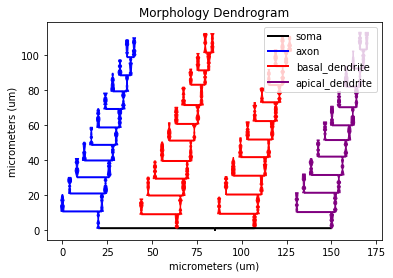

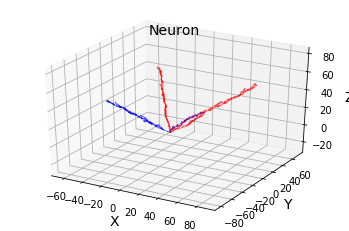

In [3]:
gt_test = nm.load_neuron(path1)
viewer.draw(gt_test, mode = 'dendrogram')
viewer.draw(gt_test, mode = '3d')
plt.show()

# Neuron with Soma removed

No soma found, setting soma at first row


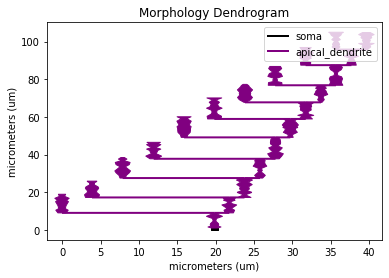

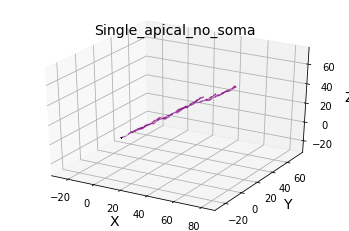

In [4]:
no_soma = nm.load_neuron(path2)
viewer.draw(no_soma, mode = 'dendrogram', output_path = 'NeuroM/figures')
viewer.draw(no_soma, mode = '3d', output_path = 'NeuroM/figures')
plt.show()

In [5]:
# Morph math tests
print(morphmath.average_points_dist(no_soma.points[0], no_soma.points))
print(morphmath.angle_3points(no_soma.points[0],no_soma.points[4],no_soma.points[5]))


45.717699219241425
0.024286796108778153


## Neuron with custom labels (Does not include 1-4)

SWC in custom format, reading > 4 as undefined
No soma found, setting soma at first row


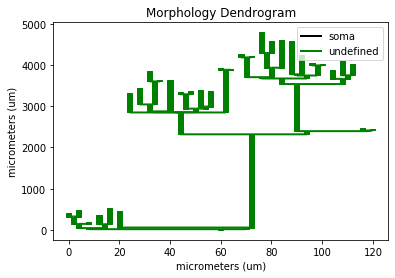

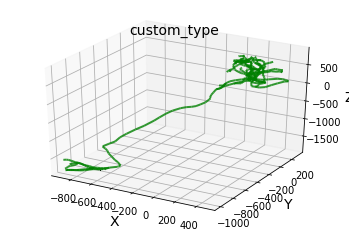

In [6]:
custom = nm.load_neuron(path3)
viewer.draw(custom, mode = 'dendrogram', output_path = 'NeuroM/figures')
viewer.draw(custom, mode = '3d', output_path = 'NeuroM/figures')
plt.show()

# Stats on Custom Type Neurons

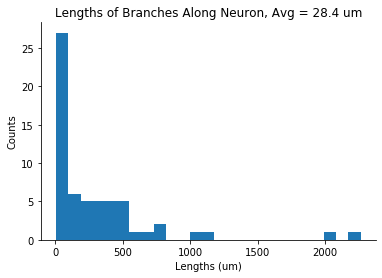

In [7]:
len_list = []
for i in range(len(custom.sections)):
    sections = custom.sections[i].length
    len_list.append(sections)
ax = plt.subplot(111)
ax.hist(len_list, bins = 25)
plt.title("Lengths of Branches Along Neuron, Avg = 28.4 um")
plt.xlabel("Lengths (um)")
plt.ylabel("Counts")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("Branch_lens.png")
plt.show()

9.98360655737705


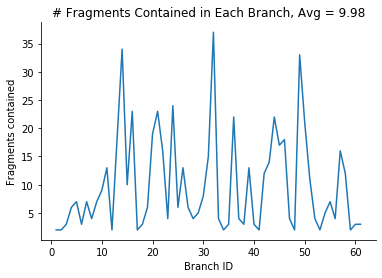

In [30]:
frags_list = []
for i in range(len(custom.sections)):
    num_pts = len(custom.sections[i].points)
    frags_list.append(num_pts)
ax = plt.subplot(111)

print(np.mean(frags_list))
ax.plot(range(1,len(custom.sections)+1),frags_list)
plt.xlabel("Branch ID")
plt.ylabel("Fragments contained")
plt.title("# Fragments Contained in Each Branch, Avg = 9.98")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("frag_counts.png")
plt.show()

## Morphology Math 

In [9]:
# avg_dist = morphmath.average_points_dist(custom.points[0], custom.points[1:])
#avg_seg_len = morphmath.segment_length(custom.sections.points)
gt_test.sections[0]

Section(id=0, type=NeuriteType.soma, n_points=2) <parent: None, nchildren: 0>

In [10]:
gt_test.sections[1].points

array([[ 0. ,  0. ,  0. ,  0.1,  1. ,  1. , -1. ],
       [ 0. ,  0.2,  0. ,  0.1,  1. ,  2. ,  1. ],
       [ 0.1,  0.1,  0. ,  0.1,  1. ,  3. ,  2. ]])

In [11]:
morphmath.path_distance(custom.points)

25199.41425984822

In [12]:
morphmath.principal_direction_extent(custom.points[:,:3])

array([3633.39633992,  787.48930716,  784.28555576])

In [13]:
morphmath.pca(custom.points[:,:3])

(array([895711.27241417,   6235.72224786,  25042.94392065]),
 array([[-0.35135926, -0.80584821, -0.47660816],
        [-0.38805257,  0.58862856, -0.70917672],
        [-0.85203397,  0.06422679,  0.51953156]]))

In [14]:
stats.compare_two(custom.points[:,:3].flatten(), gt_test.points[:,:3].flatten())

Stats(dist=0.7474195506982392, pvalue=0.0008944288292733749)

In [15]:
stats.fit_results_to_dict(stats.optimal_distribution(custom.points[:,:3].flatten()))

OrderedDict([('type', 'normal'),
             ('mu', 1.2143383296822952e-09),
             ('sigma', 555.3681758735455)])

In [16]:
stats.fit(custom.points[:,:3].flatten())

FitResults(params=(1.2143383296822952e-09, 555.3681758735455), errs=KstestResult(statistic=0.2954174432122357, pvalue=6.94907469295869e-128), type='norm')

In [17]:
c_lengths = custom.sections
c_lengths[5].points

array([[-8.66076486e+02, -8.79343050e+02, -1.75513702e+03,
         1.00000000e+00,  0.00000000e+00,  1.60000000e+01,
         1.50000000e+01],
       [-9.02685871e+02, -8.87215946e+02, -1.77884786e+03,
         1.00000000e+00,  0.00000000e+00,  1.70000000e+01,
         1.60000000e+01],
       [-9.29467127e+02, -9.11602811e+02, -1.79765843e+03,
         1.00000000e+00,  0.00000000e+00,  1.80000000e+01,
         1.70000000e+01]])

In [18]:
morphmath.path_distance(gt_test.sections[3].points)

9.64901212391979

In [19]:
gt_test.points

array([[  0.        ,   0.        ,   0.        ,   0.1       ],
       [  0.        ,   0.2       ,   0.        ,   0.1       ],
       [  0.1       ,   0.1       ,   0.        ,   0.1       ],
       ...,
       [ 63.62775338, -51.63308303,  53.20846932,   0.77868578],
       [ 64.05608725, -52.04660402,  53.29780708,   0.86904222],
       [ 64.74726272, -52.79933308,  54.20408797,   0.89648315]])

In [24]:
custom.sections[0]

Section(id=0, type=NeuriteType.soma, n_points=2) <parent: None, nchildren: 0>

In [21]:
custom.points[0]

array([-6.59974775e+02, -8.58919537e+02, -1.86293919e+03,  1.00000000e+00])